In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [13]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])


-49.11836237953386 25.602550378477503
79.35102765036183 138.52681590655874
23.783003955588143 127.21980390321124
-26.872920856090765 -97.17312754885786
67.24508472870286 -126.85625432521653
74.03037801272058 87.54568268287488
29.71380149077764 -162.7626591218548
-9.757715804648726 102.96113401478982
-59.6199806216066 -145.18997750899723
-14.634447092765754 -1.148821911979411
-38.76710567481431 -63.60445164843415
18.98849415387494 74.71004140127496
-42.868101824594696 -107.59475160160626
48.80824756208486 -100.07365920638732
26.121032518123116 -45.66219324975097
19.9775303883914 45.452967531964504
81.39939904001062 -118.25728483991072
-79.8731578008878 -95.49968874430708
18.51258836063934 -120.9733721628054
-16.627962512439368 81.30488877011175
16.581123714191662 -47.0422770476238
-37.87900928226241 -96.00028448598731
4.5372249259720405 -32.245601087629694
68.45696632534975 -124.69407353566143
80.68891263694093 -146.35342860181032
2.9060551334398923 101.2035651268364
58.37228758774404 1

In [14]:
from citipy import citipy

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


615

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kruisfontein
Processing Record 2 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 1 | hirara
Processing Record 4 of Set 1 | pisco
Processing Record 5 of Set 1 | norman wells
Processing Record 6 of Set 1 | talnakh
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | labuhan
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | bahia blanca
Processing Record 12 of Set 1 | ahmadnagar
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | boissevain
Processing Record 15 of Set 1 | codrington
Processing Record 16 of Set 1 | najran
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | constitucion
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | sinnamary
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | touros
Process

Processing Record 32 of Set 4 | iranshahr
Processing Record 33 of Set 4 | kahului
Processing Record 34 of Set 4 | amderma
City not found. Skipping...
Processing Record 35 of Set 4 | pevek
Processing Record 36 of Set 4 | tual
Processing Record 37 of Set 4 | kununurra
Processing Record 38 of Set 4 | mount isa
Processing Record 39 of Set 4 | vanavara
Processing Record 40 of Set 4 | chicama
Processing Record 41 of Set 4 | novopskov
Processing Record 42 of Set 4 | alta floresta
Processing Record 43 of Set 4 | tamandare
Processing Record 44 of Set 4 | cedar city
Processing Record 45 of Set 4 | chapais
Processing Record 46 of Set 4 | ust-nera
Processing Record 47 of Set 4 | sioux lookout
Processing Record 48 of Set 4 | middelburg
Processing Record 49 of Set 4 | halver
Processing Record 50 of Set 4 | port alfred
Processing Record 1 of Set 5 | esperance
Processing Record 2 of Set 5 | yuanping
Processing Record 3 of Set 5 | pemba
Processing Record 4 of Set 5 | mys shmidta
City not found. Skippin

Processing Record 25 of Set 8 | kolpashevo
Processing Record 26 of Set 8 | comarapa
Processing Record 27 of Set 8 | mandla
Processing Record 28 of Set 8 | liwale
Processing Record 29 of Set 8 | vanimo
Processing Record 30 of Set 8 | beringovskiy
Processing Record 31 of Set 8 | vagur
Processing Record 32 of Set 8 | chapada dos guimaraes
Processing Record 33 of Set 8 | husavik
Processing Record 34 of Set 8 | kisangani
Processing Record 35 of Set 8 | paita
Processing Record 36 of Set 8 | yelabuga
Processing Record 37 of Set 8 | aflu
City not found. Skipping...
Processing Record 38 of Set 8 | fairmont
Processing Record 39 of Set 8 | nyurba
Processing Record 40 of Set 8 | havelock
Processing Record 41 of Set 8 | maragogi
Processing Record 42 of Set 8 | pimentel
Processing Record 43 of Set 8 | semme
Processing Record 44 of Set 8 | presidencia roque saenz pena
Processing Record 45 of Set 8 | san cristobal
Processing Record 46 of Set 8 | yeppoon
Processing Record 47 of Set 8 | biak
Processing 

Processing Record 15 of Set 12 | neiafu
Processing Record 16 of Set 12 | poya
Processing Record 17 of Set 12 | cody
Processing Record 18 of Set 12 | severnyy
Processing Record 19 of Set 12 | mikuni
Processing Record 20 of Set 12 | yulara
Processing Record 21 of Set 12 | rybachiy
Processing Record 22 of Set 12 | utiroa
City not found. Skipping...
Processing Record 23 of Set 12 | avera
Processing Record 24 of Set 12 | lebanon
Processing Record 25 of Set 12 | galle
Processing Record 26 of Set 12 | sora
Processing Record 27 of Set 12 | bartica
Processing Record 28 of Set 12 | majene
Processing Record 29 of Set 12 | moerai
Processing Record 30 of Set 12 | ravar
Processing Record 31 of Set 12 | wangqing
Processing Record 32 of Set 12 | ilesha
Processing Record 33 of Set 12 | tutoia
Processing Record 34 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 35 of Set 12 | morant bay
Processing Record 36 of Set 12 | amapa
Processing Record 37 of Set 12 | sorvag
City not found. Ski

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kruisfontein,-34.0033,24.7314,62.02,68,100,12.80,ZA,2023-01-28 20:30:25
1,Hirara,24.8000,125.2833,59.49,66,100,19.82,JP,2023-01-28 20:30:28
2,Pisco,-13.7000,-76.2167,78.85,69,0,4.61,PE,2023-01-28 20:29:50
3,Norman Wells,65.2820,-126.8329,-20.16,76,20,3.44,CA,2023-01-28 20:30:28
4,Talnakh,69.4865,88.3972,-3.68,99,98,5.68,RU,2023-01-28 20:30:29
5,Kapaa,22.0752,-159.3190,75.52,69,20,18.41,US,2023-01-28 20:30:29
6,Labuhan,-6.8844,112.2051,76.24,91,100,6.06,ID,2023-01-28 20:30:30
7,Mataura,-46.1927,168.8643,64.71,59,4,1.28,NZ,2023-01-28 20:30:30
8,Jamestown,42.0970,-79.2353,37.04,44,0,13.80,US,2023-01-28 20:30:21
9,Bahia Blanca,-38.7196,-62.2724,93.29,19,0,3.00,AR,2023-01-28 20:30:12


In [23]:
len(city_data)

564

In [24]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kruisfontein,ZA,2023-01-28 20:30:25,-34.0033,24.7314,62.02,68,100,12.80
1,Hirara,JP,2023-01-28 20:30:28,24.8000,125.2833,59.49,66,100,19.82
2,Pisco,PE,2023-01-28 20:29:50,-13.7000,-76.2167,78.85,69,0,4.61
3,Norman Wells,CA,2023-01-28 20:30:28,65.2820,-126.8329,-20.16,76,20,3.44
4,Talnakh,RU,2023-01-28 20:30:29,69.4865,88.3972,-3.68,99,98,5.68
5,Kapaa,US,2023-01-28 20:30:29,22.0752,-159.3190,75.52,69,20,18.41
6,Labuhan,ID,2023-01-28 20:30:30,-6.8844,112.2051,76.24,91,100,6.06
7,Mataura,NZ,2023-01-28 20:30:30,-46.1927,168.8643,64.71,59,4,1.28
8,Jamestown,US,2023-01-28 20:30:21,42.0970,-79.2353,37.04,44,0,13.80
9,Bahia Blanca,AR,2023-01-28 20:30:12,-38.7196,-62.2724,93.29,19,0,3.00


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


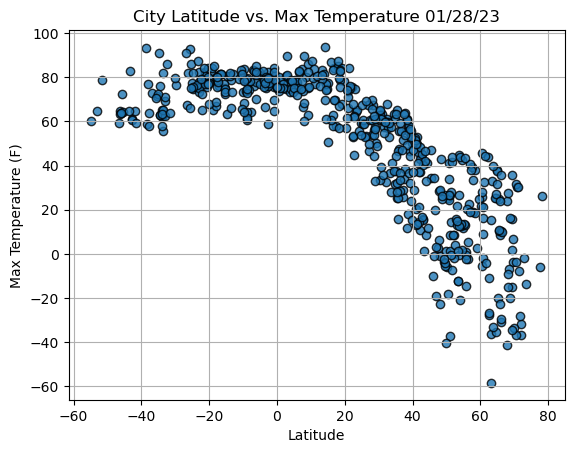

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


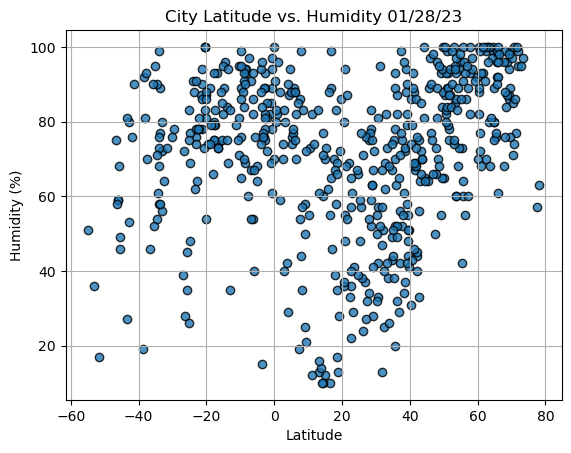

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


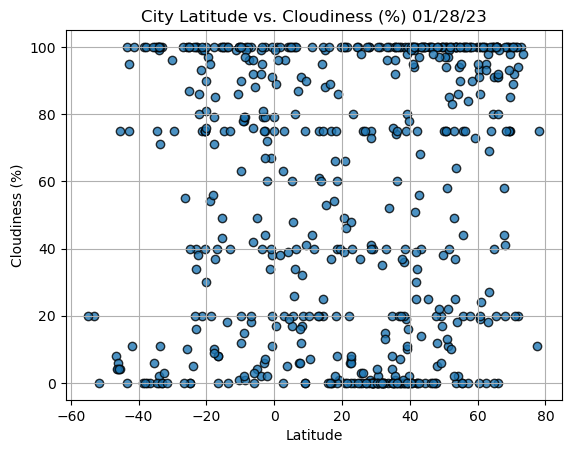

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


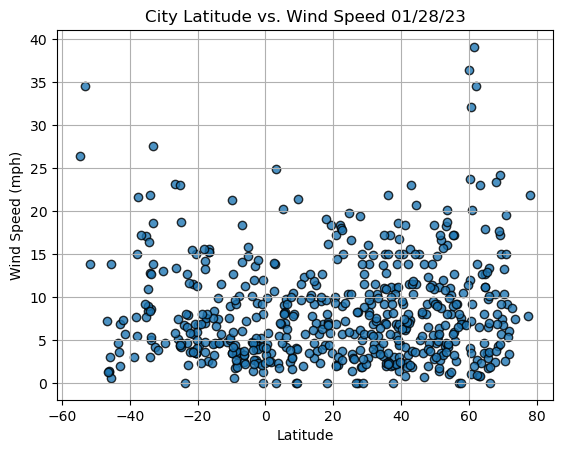

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
